In [88]:
"""""
 *  \brief     rain_labelling_test.ipynb
 *  \author    Jonathan Reymond
 *  \version   1.0
 *  \date      2023-02-14
 *  \pre       None
 *  \copyright (c) 2022 CSEM
 *
 *   CSEM S.A.
 *   Jaquet-Droz 1
 *   CH-2000 Neuchâtel
 *   http://www.csem.ch
 *
 *
 *   THIS PROGRAM IS CONFIDENTIAL AND CANNOT BE DISTRIBUTED
 *   WITHOUT THE CSEM PRIOR WRITTEN AGREEMENT.
 *
 *   CSEM is the owner of this source code and is authorised to use, to modify
 *   and to keep confidential all new modifications of this code.
 *
 """

from constants import *
from prepare_data import *
from tools import *
import os
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from torchaudio.transforms import Resample
import functools
import operator
import math
from extract_data import *
from random import randint
import time 
from scipy.io import wavfile
from collections import Counter
from sklearn.linear_model import LinearRegression
from datetime import timedelta
os.chdir('/local/user/jrn/tinyml-challenge-2022')

## Compressing label test

In [19]:
df['wind_count'].value_counts().sort_index()

0.0     76836
1.0        23
2.0     29626
3.0        20
4.0     29173
5.0        24
6.0     10574
7.0         8
8.0      2972
9.0         3
10.0     1031
11.0        2
12.0      358
13.0        1
14.0      113
16.0       19
18.0        4
20.0        4
22.0        2
Name: wind_count, dtype: int64

In [ ]:
def compress_labels(x):
    if 0 <= x and x <= 6.5:
        return 0

    elif 6.5 < x and x <= 16 :
        return 6
    else :
        raise Exception("Value not in the range [0, 16]") 

df['wind_count'].map(compress_labels).value_counts().sort_index()

0    65279
6    11693
Name: wind_count, dtype: int64

## Data rain labelling

In [12]:
rain_labels = pd.read_csv('/local/user/jrn/tinyml-challenge-2022/data/outside/9_11_2022/other/rain_labels_tab.csv')
rain_labels

,hour,minutes,seconds,rain_level
0,5,0,0,1
1,5,9,10,2
2,5,10,40,1
3,5,13,17,0
4,5,13,46,1
...,...,...,...,...
283,28,23,17,0
284,28,23,28,1
285,28,23,38,1
286,28,24,7,0


In [22]:
rain_labels = pd.read_csv('/local/user/jrn/tinyml-challenge-2022/data/outside/9_11_2022/other/rain_labels_tab.csv')
# merged_df = []

# for hour in INDEX_HOURS:
#     df = pd.read_pickle(get_result_filename(hour))
#     df['rain_level'] = 0
#     df.to_pickle(get_result_filename(hour))
    

for hour, hour_group in rain_labels.groupby('hour'):
    
    if hour == 9:
        
        df = pd.read_pickle(get_result_filename(hour))
        df['rain_level'] = 0
        intervals = []
        prev_entry = None
        for index, row in hour_group.iterrows():
            
            
            next_entry = (time_to_index_entry(row['minutes'], row['seconds']), row['rain_level'])
            if prev_entry is not None :
                df['rain_level'].iloc[prev_entry[0]: next_entry[0]] = prev_entry[1] 
                print(row.to_dict(), prev_entry[1])
            prev_entry = next_entry
        # for last entry    
        df['rain_level'].iloc[prev_entry[0]::] = prev_entry[1]
        
        df.to_pickle(get_result_filename(hour))
    
# merged_df = pd.concat(merged_df)


/tmp/ipykernel_20885/4206034637.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain_level'].iloc[prev_entry[0]: next_entry[0]] = prev_entry[1]
/tmp/ipykernel_20885/4206034637.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain_level'].iloc[prev_entry[0]::] = prev_entry[1]


{'hour': 9, 'minutes': 0, 'seconds': 20, 'rain_level': 1} 2
{'hour': 9, 'minutes': 1, 'seconds': 35, 'rain_level': 2} 1
{'hour': 9, 'minutes': 2, 'seconds': 25, 'rain_level': 3} 2
{'hour': 9, 'minutes': 3, 'seconds': 0, 'rain_level': 2} 3
{'hour': 9, 'minutes': 3, 'seconds': 30, 'rain_level': 3} 2
{'hour': 9, 'minutes': 4, 'seconds': 20, 'rain_level': 4} 3
{'hour': 9, 'minutes': 4, 'seconds': 30, 'rain_level': 3} 4
{'hour': 9, 'minutes': 4, 'seconds': 50, 'rain_level': 4} 3
{'hour': 9, 'minutes': 5, 'seconds': 20, 'rain_level': 3} 4
{'hour': 9, 'minutes': 5, 'seconds': 40, 'rain_level': 4} 3
{'hour': 9, 'minutes': 5, 'seconds': 50, 'rain_level': 3} 4
{'hour': 9, 'minutes': 6, 'seconds': 25, 'rain_level': 4} 3
{'hour': 9, 'minutes': 6, 'seconds': 34, 'rain_level': 3} 4
{'hour': 9, 'minutes': 7, 'seconds': 13, 'rain_level': 4} 3
{'hour': 9, 'minutes': 8, 'seconds': 3, 'rain_level': 3} 4
{'hour': 9, 'minutes': 8, 'seconds': 25, 'rain_level': 4} 3
{'hour': 9, 'minutes': 8, 'seconds': 50, '

In [4]:
def compress_labels_rain(x):
    if x >= 3 :
        return 2
    elif x >= 1 :
        return 1
    else :
        return 0

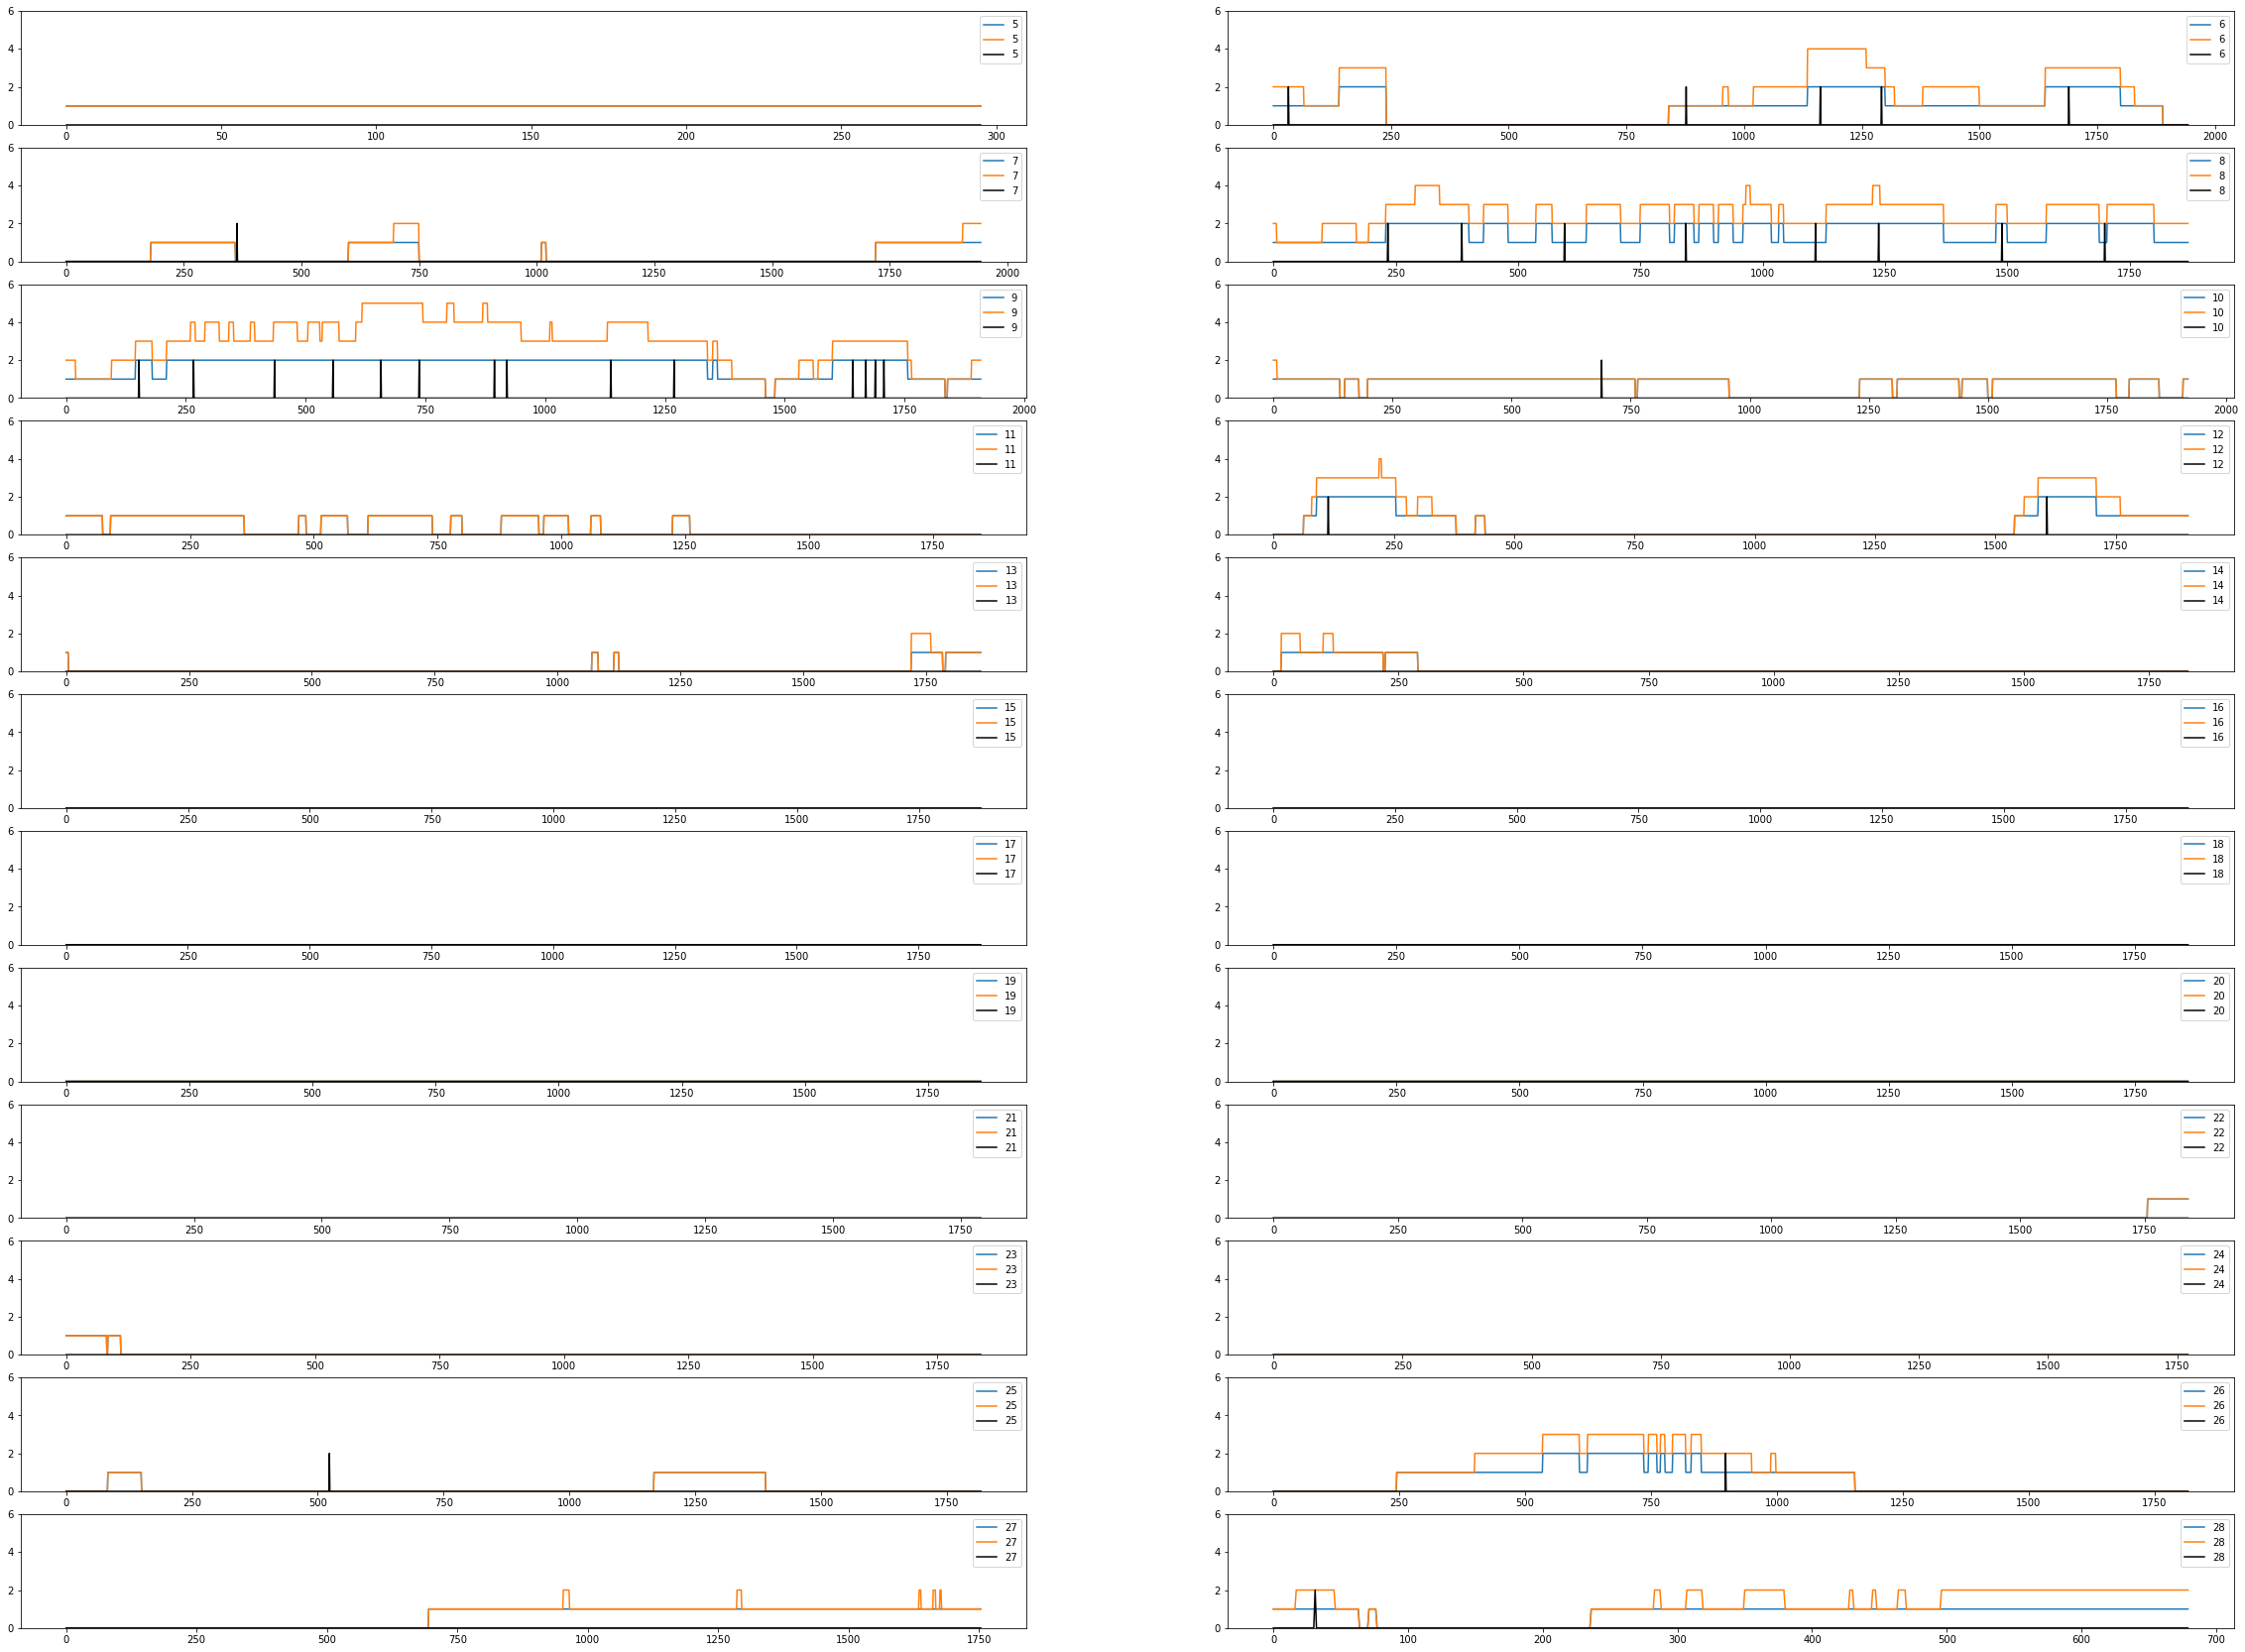

In [23]:
studied_hours = INDEX_HOURS

nrows = int(len(studied_hours) /2)
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 30))

idx = 0
for hour in studied_hours:
        df = pd.read_pickle(get_result_filename(hour))
        ax = axes[idx // ncols ,idx % ncols]
        ax.plot(df['rain_level'].map(compress_labels_rain) , label=str(hour))
        ax.plot(df['rain_level'] , label=str(hour))
        ax.plot(df['rain_count'] , label=str(hour), color='black')
        # axes[hour].ylim([10, 23])
        ax.axis(ymin=0, ymax=6)
        ax.legend()
        idx += 1

In [49]:
# 87
drop_87 = [[( 17,50), (18,00)], 
                [(18,44), (20,30)],
                [(20, 40), (-1, -1)]]

rain_87 = [[(18,00), (18,44)]]

# 88
drop_88 = [[(0,0), (0,24)],
                [(2,40), (3,53)],
                [(4, 13), (4, 37)],
                [(6, 00), (10, 20)],
                [(11, 45), (12, 17)],
                [(12, 30), (13, 20)],
                [(13, 50), (14, 57)], 
                [(15, 4), (-1, -1)]]

rain_88 = [[(0,24), (2, 40)],
                [(3,53), (4,13)],
                [(4, 37), (6, 00)],
                [(10, 20), (11, 45)],
                [(12, 17), (12, 30)],
                [(13, 20), (13, 50)],
                [(14, 57), (15, 4)]] 


def get_interval_rain(l):
    l_index_res = []
    for interval in l :
        left_idx = time_to_index2(*interval[0])
        right_idx = time_to_index2(*interval[1])
        l_index_res.append((left_idx, right_idx))
    return l_index_res

def set_rain_level_to_df(df, index_intervals, rain_level):
    for interval in index_intervals :
        df['rain_count'].iloc[interval[0]: interval[1]] = rain_level
    print(df['rain_count'].value_counts())
    return df




In [50]:
# 87 process
df_87 = pd.read_pickle(get_result_filename(87))
df_87 = set_rain_level_to_df(df_87, get_interval_rain(drop_87), 1)
df_87 = set_rain_level_to_df(df_87, get_interval_rain(rain_87), 2)



# 88 process
df_88 = pd.read_pickle(get_result_filename(88))
df_88 = set_rain_level_to_df(df_88, get_interval_rain(drop_88), 1)
df_88 = set_rain_level_to_df(df_88, get_interval_rain(rain_88), 2)


0.0    1125
1.0     369
Name: rain_count, dtype: int64
0.0    1081
1.0     369
2.0      44
Name: rain_count, dtype: int64
1.0    658
0.0    375
Name: rain_count, dtype: int64
1.0    658
2.0    374
0.0      1
Name: rain_count, dtype: int64


/tmp/ipykernel_10537/91365948.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain_count'].iloc[interval[0]: interval[1]] = rain_level
/tmp/ipykernel_10537/91365948.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain_count'].iloc[interval[0]: interval[1]] = rain_level
/tmp/ipykernel_10537/91365948.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain_count'].iloc[interval[0]: interval[1]] = rain_level
/tmp/ip

In [51]:
df_87.to_pickle(get_result_filename(87))
df_88.to_pickle(get_result_filename(88))

753.0


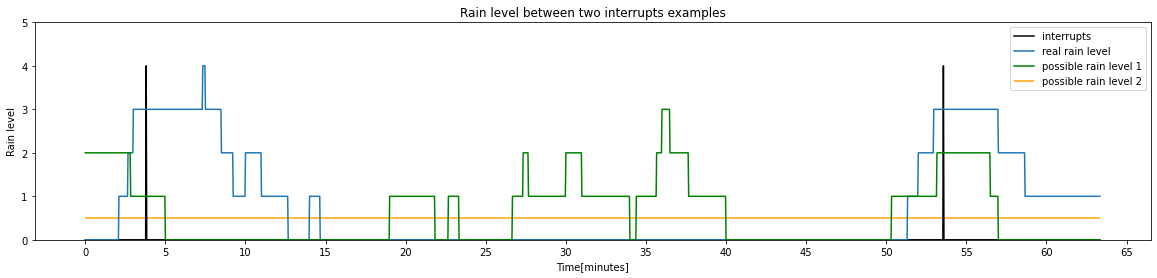

In [94]:
# df_87_res = pd.read_pickle(get_result_filename(8))
df_9_res = pd.read_pickle(get_result_filename(12))

fake = pd.Series(np.zeros(len(df_9_res)))
fake.iloc[0:85] = 2
fake.iloc[85:150] = 1
fake.iloc[570:655] = 1
fake.iloc[680:700] = 1
fake.iloc[800:1200] = 1
fake.iloc[820:830] = 2
fake.iloc[900:930] = 2
fake.iloc[1020:1032] = 0
fake.iloc[1070:1130] = 2
fake.iloc[1080:1095] = 3
fake.iloc[1510:] = 1
fake.iloc[1595:] = 2
fake.iloc[1695:] = 1
fake.iloc[1710:] = 0
print(sum(fake.iloc[114:1607]))
x_range = (np.arange(len(fake)) * 2) / 60

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(x_range, df_9_res['rain_count']* 2, color='black', label='interrupts')
ax.plot(x_range, df_9_res['rain_level'], label='real rain level')
ax.plot(x_range, fake, color='green', label='possible rain level 1')
ax.hlines(y=757/(1607-114), xmin=0, xmax=x_range[-1], color='orange', label='possible rain level 2')
ax.axis(ymin=0, ymax=5)
ax.set_xlabel("Time[minutes]")
ax.set_ylabel("Rain level")

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.legend()
plt.title("Rain level between two interrupts examples")
plt.savefig('rain_interrupts_example.png', dpi=200)


In [17]:
df_9_res['rain_count'][df_9_res['rain_count'] > 0]

114     2.0
1607    2.0
Name: rain_count, dtype: float64

In [20]:
sum(df_9_res['rain_level'].iloc[114:1607])

757

In [32]:
len(df_9_res)/60

31.683333333333334